# 신경망 기초 

참고 사이트 : https://www.tensorflow.org/tutorials?hl=ko

In [1]:
# 필요한 라이브러리 import 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 준비

In [2]:
n = 20000
ts = 4000
vs =4000

In [3]:
# 균일분포(0,2)에서 랜덤넘버를 생성하여 1.2 이상과 이하로 이진 분류데이터 생성  
x = np.random.uniform(0,2, n)
y=[]
for i in x:
  if i >1.2:
    y.append(1)
  else :
    y.append(0)


In [4]:
# 데이터에 대한 라벨 확인
df = pd.DataFrame(x)
df['class'] = y
df

,0,class
0,0.008470,0
1,0.181231,0
2,1.414140,1
3,1.282573,1
4,0.602359,0
...,...,...
19995,0.978220,0
19996,0.161711,0
19997,1.225457,1
19998,1.776596,1


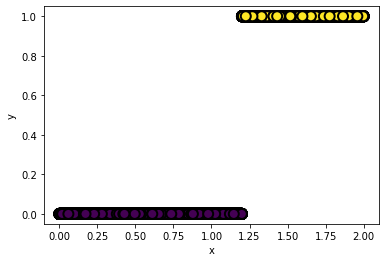

In [5]:
plt.scatter(x, y, marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
# train, test, validataion data로 분리 , 20000개의 데이터를 ts, vs 사이즈 4000개씩 분리 
train_df, test_df = train_test_split(df, test_size=ts,random_state=123)
train_df, val_df = train_test_split(train_df, test_size=vs,random_state=123)
len(train_df)

12000

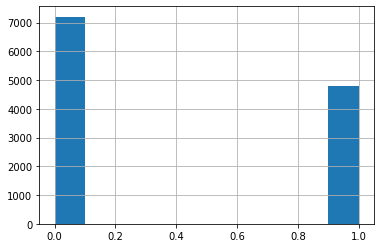

In [13]:
train_df['class'].hist()

In [14]:
train_df[:2]

,0,class
7157,1.184484,0
5644,1.388846,1


# 모델링

In [15]:
# 입력데이터로 정리  
y_train = train_df.pop('class')
x_train = train_df
y_test = test_df.pop('class')
x_test = test_df
y_val = val_df.pop('class')
x_val = val_df
x_train

,0
7157,1.184484
5644,1.388846
12598,0.593266
10253,0.767981
7711,0.654824
...,...
15338,1.464801
9363,1.252473
13724,0.753752
13954,0.636503


In [16]:
# input_shape, 입력변수의 개수 확인 
train_features = np.array(train_df)
train_features.shape[-1]

1

In [17]:
# 다층의 layer를 쌓아서 모델링, 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택 
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
#모델 요약해서 보기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


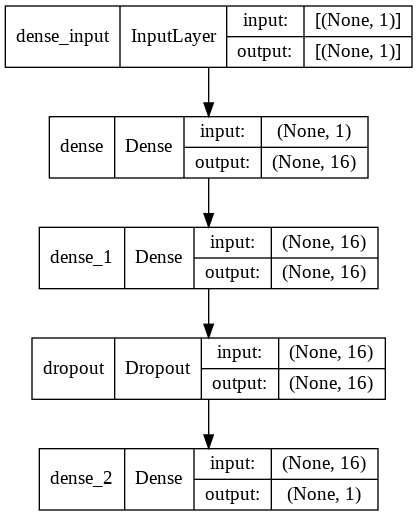

In [19]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

# Training

In [20]:
# 모델 저장 설정
save_weights = tf.keras.callbacks.ModelCheckpoint("model.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)

In [21]:
# 모델 학습 및 필요 데이터 저장 
history = model.fit(x_train, y_train, validation_data=(x_val, y_val) ,
                    epochs=40, 
                    batch_size=256,
                    callbacks=[save_weights])

Epoch 1/40
29/47 [=================>............] - ETA: 0s - loss: 0.6894 - accuracy: 0.6272 
Epoch 00001: val_accuracy improved from -inf to 0.97425, saving model to model.hdf5
47/47 [==============================] - 1s 8ms/step - loss: 0.6766 - accuracy: 0.6581 - val_loss: 0.6386 - val_accuracy: 0.9743
Epoch 2/40
32/47 [===================>..........] - ETA: 0s - loss: 0.6098 - accuracy: 0.7565
Epoch 00002: val_accuracy did not improve from 0.97425
47/47 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7722 - val_loss: 0.5399 - val_accuracy: 0.9703
Epoch 3/40
31/47 [==================>...........] - ETA: 0s - loss: 0.5195 - accuracy: 0.8285
Epoch 00003: val_accuracy improved from 0.97425 to 0.99175, saving model to model.hdf5
47/47 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.8343 - val_loss: 0.4409 - val_accuracy: 0.9918
Epoch 4/40
27/47 [================>.............] - ETA: 0s - loss: 0.4382 - accuracy: 0.8656
Epoch 0000

# 평가

In [22]:
# 훈련된 이미지 분류기는 이 데이터셋에서 거의 99.9%의 정확도를 달성
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

125/125 - 0s - loss: 0.0246 - accuracy: 0.9977 - 293ms/epoch - 2ms/step
Loss:  0.02456417866051197
Accuracy:  0.9977499842643738


In [23]:
# 학습간 저장된 데이터 확인  
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

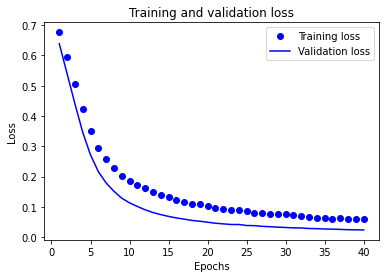

In [24]:
# 손실과 정확도 도식 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

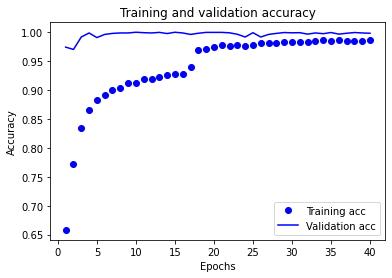

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# 배포 

In [26]:
new_x = [-1, 0.3, 1.1, 1.2, 2]

In [27]:
# 저장된 모델 호출 
model.load_weights('model.hdf5')

y_pred = model.predict( new_x)
print(np.round(y_pred).astype(int))

[[0]
 [0]
 [0]
 [1]
 [1]]
